In [24]:
import matplotlib

matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['xaxis.labellocation'] = "right"
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['ytick.minor.visible'] = True

In [2]:
filename = "/media/DataOcean/projects/tracking/integrateToAthena/run_main_clean/track_info_GNN4ITk.npz"

In [3]:
import numpy as np

# Load data
data = np.load(filename, allow_pickle=True)

In [4]:
[key for key in data.keys()]

['num_tracks',
 'num_clusters_per_track',
 'num_si_clusters_per_track',
 'num_pixel_clusters_per_track',
 'num_sp_per_track',
 'num_strip_sp_per_track',
 'num_non_ghost_sp_per_track',
 'num_non_ghost_strip_sp_per_track',
 'eta_per_track']

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
def get_profile(x, y, xbins, range):
    bin_means, bin_edges, binnumber = binned_statistic(
        x, y, statistic="mean", bins=xbins, range=range
    )
    bin_std, _, _ = binned_statistic(x, y, statistic="std", bins=xbins, range=range)

    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[1:] - bin_width / 2
    return bin_centers, bin_means, bin_std


def plot_profile(x, y, xbins, range, xlabel, ylabel, title, output):
    bin_centers, bin_means, bin_std = get_profile(x, y, xbins, range)
    plt.errorbar(
        bin_centers,
        bin_means,
        yerr=bin_std,
        fmt="o",
        color="black",
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(output)
    plt.show()

## Clusters

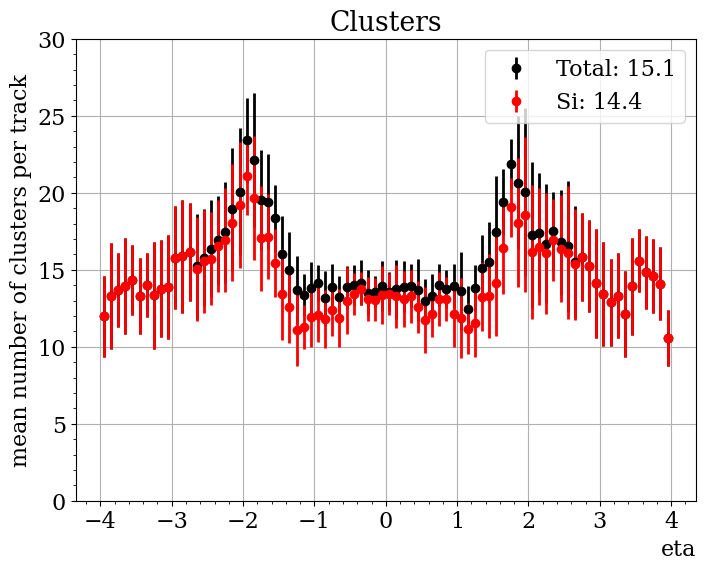

In [31]:

eta_config = {
    "xbins": 80,
    "range": [-4, 4]
}
bin_center, cluster_means, cluster_std = get_profile(data["eta_per_track"], data["num_clusters_per_track"], **eta_config)
_, sicluster_means, sicluster_std = get_profile(data["eta_per_track"], data["num_si_clusters_per_track"], **eta_config)


fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(bin_center, cluster_means, yerr=cluster_std, fmt="o", color="black", label="Total: {:.1f}".format(np.mean(data["num_clusters_per_track"])))
plt.errorbar(bin_center, sicluster_means, yerr=sicluster_std, fmt="o", color="red", label="Si: {:.1f}".format(np.mean(data["num_si_clusters_per_track"])))
plt.xlabel("eta")
plt.ylabel("mean number of clusters per track")
plt.ylim(0, 30)
plt.title("Clusters")
plt.legend()
plt.grid()
plt.show()

On average, (15.1 - 14.4) / 15.1 = 4.6% of the strip clusters do not have a corresponding space point. Therefore, these clusters will be losted in the GNN-based tracking algorithm.

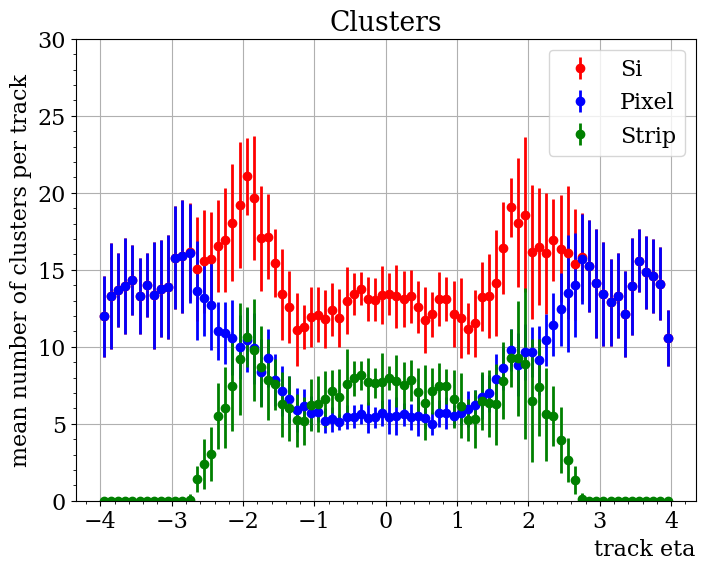

In [34]:
eta_config = {
    "xbins": 80,
    "range": [-4, 4]
}
bin_center, sicluster_means, sicluster_std = get_profile(data["eta_per_track"], data["num_si_clusters_per_track"], **eta_config)
_, pixel_means, pixel_std = get_profile(data["eta_per_track"], data["num_pixel_clusters_per_track"], **eta_config)
num_strip_clusters_per_track = data["num_si_clusters_per_track"] - data["num_pixel_clusters_per_track"]
_, strip_means, strip_std = get_profile(data["eta_per_track"], num_strip_clusters_per_track, **eta_config)

fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(bin_center, sicluster_means, yerr=sicluster_std, fmt="o", color="red", label="Si")
plt.errorbar(bin_center, pixel_means, yerr=pixel_std, fmt="o", color="blue", label="Pixel")
plt.errorbar(bin_center, strip_means, yerr=strip_std, fmt="o", color="green", label="Strip")
plt.xlabel("track eta")
plt.ylabel("mean number of clusters per track")
plt.ylim(0, 30)
plt.title("Clusters")
plt.legend()
plt.grid()
plt.show()


## Space points

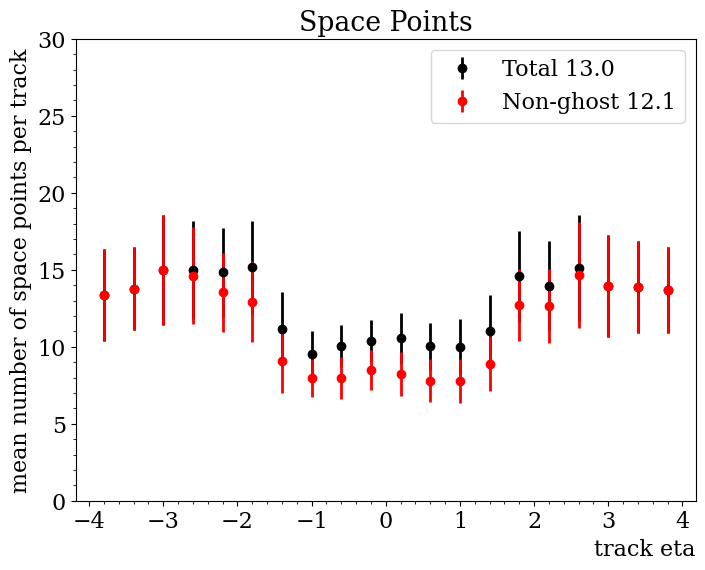

In [36]:
eta_config = {
    "xbins": 20,
    "range": [-4, 4]
}
bin_center, sp_means, sp_std = get_profile(data["eta_per_track"], data["num_sp_per_track"], **eta_config)
_, nonghost_sp_means, nonghost_sp_std = get_profile(data["eta_per_track"], data["num_non_ghost_sp_per_track"], **eta_config)

fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(bin_center, sp_means, yerr=sp_std, fmt="o", color="black", label="Total: {:.1f}".format(np.mean(data["num_sp_per_track"])))
plt.errorbar(bin_center, nonghost_sp_means, yerr=nonghost_sp_std, fmt="o", color="red", label="Non-ghost: {:.1f}".format(np.mean(data["num_non_ghost_sp_per_track"])))
plt.xlabel("track eta")
plt.ylabel("mean number of space points per track")
plt.title("Space Points")
plt.ylim(0, 30)
plt.legend()
plt.show()

Total number of space points per track is the number of unique spacepoints in the track. Non-ghost space point means there are two corresponding strip clusters in the track. The difference is the number of strip space points that do not have two strip clusters in the track. On avereage, that is (13.0 - 12.1) / 13.0 = 6.9% of all space points.

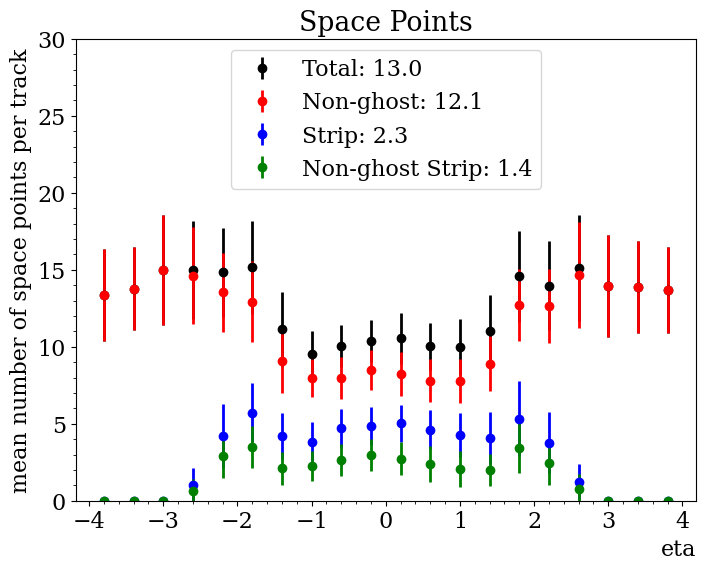

In [41]:
eta_config = {
    "xbins": 20,
    "range": [-4, 4]
}
bin_center, sp_means, sp_std = get_profile(data["eta_per_track"], data["num_sp_per_track"], **eta_config)
_, strip_means, strip_std = get_profile(data["eta_per_track"], data["num_strip_sp_per_track"], **eta_config)
_, nonghost_sp_means, nonghost_sp_std = get_profile(data["eta_per_track"], data["num_non_ghost_sp_per_track"], **eta_config)
_, nonghost_strip_means, nonghost_strip_std = get_profile(data["eta_per_track"], data["num_non_ghost_strip_sp_per_track"], **eta_config)

fig, ax = plt.subplots(figsize=(8, 6))
plt.errorbar(bin_center, sp_means, yerr=sp_std, fmt="o", color="black", label="Total: {:.1f}".format(np.mean(data["num_sp_per_track"])))
plt.errorbar(bin_center, nonghost_sp_means, yerr=nonghost_sp_std, fmt="o", color="red", label="Non-ghost: {:.1f}".format(np.mean(data["num_non_ghost_sp_per_track"])))
plt.errorbar(bin_center, strip_means, yerr=strip_std, fmt="o", color="blue", label="Strip: {:.1f}".format(np.mean(data["num_strip_sp_per_track"])))
plt.errorbar(bin_center, nonghost_strip_means, yerr=nonghost_strip_std, fmt="o", color="green", label="Non-ghost Strip: {:.1f}".format(np.mean(data["num_non_ghost_strip_sp_per_track"])))
plt.xlabel("eta")
plt.ylabel("mean number of space points per track")
plt.title("Space Points")
plt.legend(loc="upper center")
plt.ylim(0, 30)
plt.show()

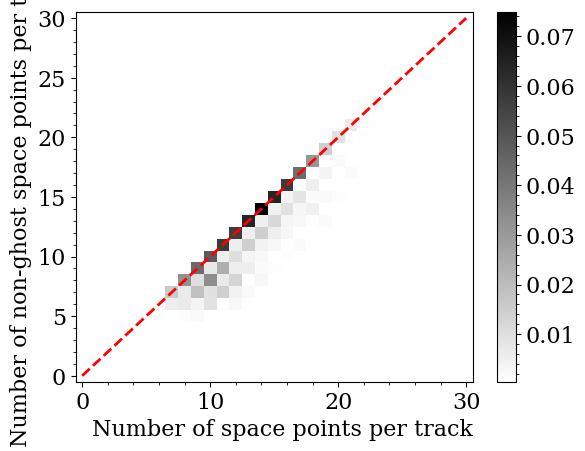

In [45]:
plt.hist2d(data["num_sp_per_track"], data["num_non_ghost_sp_per_track"], bins=(31, 31), range=[[-0.5, 30.5], [-0.5, 30.5]], cmap=plt.cm.binary, cmin=0.000001, density=True)
plt.colorbar()
plt.plot([0, 30], [0, 30], "r--")
plt.xlabel("Number of space points per track")
plt.ylabel("Number of non-ghost space points per track")
plt.show()